In [3]:
import numpy as np
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt
from astropy.table import Table

In [38]:
def mask_lc(lc, sigma):
    dt_next_obs = lc['mjd'][1:] - lc['mjd'][:-1]
    lc_mask = np.zeros(len(lc['mjd']), dtype=bool)
    epoch_indices = np.argwhere(dt_next_obs>170)
    for i in range(len(epoch_indices)+1):
        if i==0:
            kmin = 0
            kmax = epoch_indices[i][0]+1
        elif i==len(epoch_indices):
            kmin = epoch_indices[i-1][0]+1
            kmax = -1
        else:
            kmin = epoch_indices[i-1][0]+1
            kmax = epoch_indices[i][0]+1
        lc_mask[kmin:kmax] = sigma_clip(lc['psMag'][kmin:kmax], sigma, masked=True, cenfunc='median').mask
    return lc[~lc_mask]

In [2]:
fnames = [
    "object1415792.dat",
    "object1444606.dat",
    "object1464480.dat",
    "object1465497.dat",
]

In [7]:
lc = Table.read(fnames[0], format='ascii')
lc.sort('mjd')
lc = lc[lc['mjd']>53500]

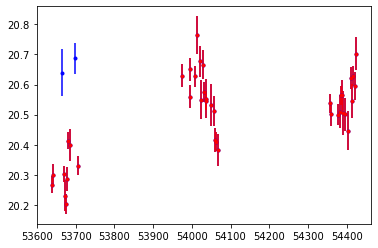

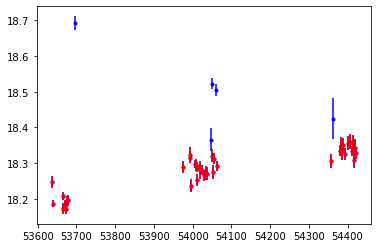

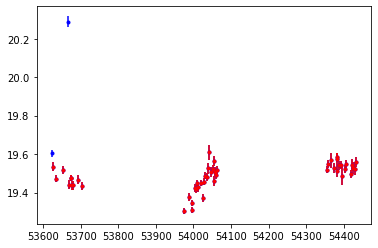

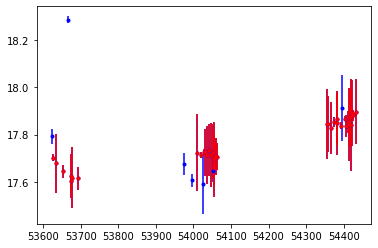

In [39]:
for fname in fnames: 
    lc = Table.read(fname, format='ascii')
    lc.sort('mjd')
    lc = lc[lc['mjd']>53500]

    lc_masked = mask_lc(lc, sigma=2.5)

    plt.errorbar(lc['mjd'], lc['psMag'], yerr=lc['psMagErr'], fmt='b.')
    plt.errorbar(lc_masked['mjd'], lc_masked['psMag'], yerr=lc_masked['psMagErr'], fmt='r.')
    plt.show()